# House Price Prediction
for given house details estimate appropriate  price

Main steps in machine
1. Data ingestion - read the file
2.  Perform basic data quality checks
3. Separate X and Y
4. train test split 
5. Apply preprocessing on xtrain, xtest
6. Feature Select -> select the relevant feature
7. Regurlarization - L1(Lasso) L2(Ridge)
8. Select the best model
9. Out of sample prediction
10.  save the best model and preprocessor

In [13]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1 - Data Ingestion

In [14]:
import pandas as pd
df = pd.read_csv("training_set.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Target Feature - Saleprice
estimate saleprice based on other col.
# Step 2 - basic data quality check

In [15]:
df.shape

(1460, 81)

In [16]:
m = df.isna().sum()
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
cat_unique = df.select_dtypes(include="object").nunique()
cat_unique

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [19]:
cardinality = cat_unique / len(df)
cardinality

MSZoning         0.003425
Street           0.001370
Alley            0.001370
LotShape         0.002740
LandContour      0.002740
Utilities        0.001370
LotConfig        0.003425
LandSlope        0.002055
Neighborhood     0.017123
Condition1       0.006164
Condition2       0.005479
BldgType         0.003425
HouseStyle       0.005479
RoofStyle        0.004110
RoofMatl         0.005479
Exterior1st      0.010274
Exterior2nd      0.010959
MasVnrType       0.002055
ExterQual        0.002740
ExterCond        0.003425
Foundation       0.004110
BsmtQual         0.002740
BsmtCond         0.002740
BsmtExposure     0.002740
BsmtFinType1     0.004110
BsmtFinType2     0.004110
Heating          0.004110
HeatingQC        0.003425
CentralAir       0.001370
Electrical       0.003425
KitchenQual      0.002740
Functional       0.004795
FireplaceQu      0.003425
GarageType       0.004110
GarageFinish     0.002055
GarageQual       0.003425
GarageCond       0.003425
PavedDrive       0.002055
PoolQC      

In [20]:
cardinality[cardinality > 0.8]

Series([], dtype: float64)

# Step 3 - Seprate x and y(saleprice)

In [21]:
x = df.drop(columns=["Id","SalePrice"])
y = df["SalePrice"]

In [22]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [23]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

# Step 4 - Apply Train Test Split

# train model on xtrain , y train
# use xtest and ytest to evaluate model

In [24]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=21)

In [25]:
xtrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
710,30,RL,56.0,4130,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1098,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1286,20,RL,NaN,9790,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
992,60,RL,80.0,9760,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnWw,NaN,0,7,2007,WD,Normal
631,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal


In [26]:
ytrain.head()

710      52000
1098    128000
1286    143000
992     187000
631     209500
Name: SalePrice, dtype: int64

In [27]:
xtest.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
880,20,RL,60.0,7024,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
605,60,RL,85.0,13600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,189,0,NaN,NaN,NaN,0,10,2009,WD,Normal
1166,20,RL,64.0,10475,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
216,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
970,50,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml


In [28]:
ytest.head()

880     157000
605     205000
1166    245350
216     210000
970     135000
Name: SalePrice, dtype: int64

# Step 5 - Apply Preprocessing on xtrain and xtest

1. num cols : SimpleImputer (to replace missing values mean, median) -> StandardScaler (to scale data mean=0, std=1)
2. cat cols : SimpleImputer (to replace missing values most_frequent, constant) -> OrdinalEncoder -> StandardScaler

In [29]:
cat_cols = x.select_dtypes(include='object').columns.tolist()
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [30]:
num_cols =x.select_dtypes (include='number').columns.tolist()
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [32]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

In [33]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='not_available'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    StandardScaler()
)

In [34]:
pre = ColumnTransformer(
    [
        ('num',num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)
    ]
).set_output(transform='pandas')

In [35]:
pre.fit(xtrain)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [36]:
xtrain_pre = pre.transform(xtrain)
xtrain_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
710,-0.639505,-0.640097,-0.610390,-2.264159,0.371687,-1.182858,0.877919,-0.580525,-0.968830,-0.274742,...,1.80698,1.908866,1.663409,1.793075,-3.520289,0.064506,0.458715,0.187833,0.308409,0.200871
1098,-0.166757,-0.906459,-0.437322,-1.536438,0.371687,-1.150075,-1.703259,-0.580525,0.496747,-0.274742,...,1.29070,0.796313,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
1286,-0.875879,-0.018586,-0.086559,-0.080996,-0.521585,-0.264931,-1.070140,1.882760,0.272112,0.229492,...,-0.77442,0.796313,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
992,0.069617,0.425350,-0.089336,-0.080996,2.158232,-0.232148,0.390904,1.276497,0.200142,0.453597,...,-0.77442,-0.316239,0.099108,0.069362,0.306326,0.064506,-0.471457,0.187833,0.308409,0.200871
631,1.487861,-1.616757,-0.567817,1.374445,-0.521585,1.144742,1.024023,0.009352,-0.916488,-0.274742,...,-0.77442,-0.316239,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871


In [37]:
xtest_pre = pre.transform(xtest)
xtest_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
880,-0.875879,-0.462522,-0.342552,-0.808717,-0.521585,1.111959,1.024023,-0.580525,1.168470,-0.274742,...,-0.77442,-1.428792,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
605,0.069617,0.647318,0.266055,0.646725,0.371687,-0.199365,0.244800,0.380757,0.021307,-0.274742,...,-0.77442,0.796313,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
1166,-0.875879,-0.284948,-0.023163,1.374445,-0.521585,1.210308,1.121426,-0.187273,-0.968830,-0.274742,...,-0.77442,-0.316239,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
216,-0.875879,-0.240554,-0.210576,0.646725,-0.521585,1.079176,0.926620,0.872322,1.094318,-0.274742,...,-0.77442,0.796313,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
970,-0.166757,-0.462522,0.006916,-1.536438,-1.414858,-0.723895,-1.703259,-0.580525,-0.968830,-0.274742,...,1.80698,1.908866,1.663409,1.793075,0.306326,0.064506,0.458715,0.187833,0.308409,-3.508497


#  Without feature selection check model performance

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

baseline_model = LinearRegression()
scores1 = cross_val_score(baseline_model, xtrain_pre, ytrain , cv=5 , scoring='r2')
scores1

array([0.47429083, 0.75809139, 0.87674635, 0.84109937, 0.8682828 ])

In [39]:
# cross validation score > 0.8
scores1.mean()

np.float64(0.7637021490230197)

In [40]:
# std or fluctuation should be as low as possible

scores1.std()

np.float64(0.15066308493133415)

In [41]:
baseline_model.fit(xtrain_pre, ytrain)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
train_r2 = baseline_model.score(xtrain_pre, ytrain)
train_r2

0.8659369195929708

In [43]:
test_r2 = baseline_model.score(xtest_pre, ytest)
test_r2

0.8023366414636373

In [44]:
gen_err = abs(train_r2 - test_r2)
print(gen_err)

0.06360027812933355


In [45]:
def evaluate_single_model(model, xtrain, ytrain, xtest, ytest):
    # get cross validated score
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="r2")
    # calculate cv mean and std
    cv_mean = scores.mean().round(4)
    cv_std = scores.std().round(4)
    # Fit the model
    model.fit(xtrain, ytrain)
    # Calcualte train r2 and test r2
    train_r2 = round(model.score(xtrain, ytrain), 4)
    test_r2 = round(model.score(xtest, ytest), 4)
    gen_err = round(abs(train_r2 - test_r2), 4)
    # show results in dictionary
    return {
        "model_name": type(model).__name__,
        "model": model,
        "cv_mean": cv_mean,
        "cv_std": cv_std,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "gen_err": gen_err,
    }
 

In [46]:
# result list is created to score different model results
results= []
r = evaluate_single_model(baseline_model,xtrain_pre , ytrain , xtest_pre , ytest)
print(r)
results.append(r)

{'model_name': 'LinearRegression', 'model': LinearRegression(), 'cv_mean': np.float64(0.7637), 'cv_std': np.float64(0.1507), 'train_r2': 0.8659, 'test_r2': 0.8023, 'gen_err': 0.0636}


# With Feature Selection

In [47]:
from sklearn.feature_selection import SequentialFeatureSelector

sel = SequentialFeatureSelector(
    LinearRegression(), n_features_to_select ='auto', direction='backward'
).set_output(transform='pandas')
sel.fit(xtrain_pre , ytrain)

,estimator,LinearRegression()
,n_features_to_select,'auto'
,tol,None
,direction,'backward'
,scoring,None
,cv,5
,n_jobs,None
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [48]:
sel_cols = sel.get_feature_names_out()
print(sel_cols)

['num__MSSubClass' 'num__LotArea' 'num__OverallQual' 'num__OverallCond'
 'num__YearBuilt' 'num__YearRemodAdd' 'num__MasVnrArea' 'num__BsmtFinSF1'
 'num__BsmtFinSF2' 'num__BsmtUnfSF' 'num__TotalBsmtSF' 'num__1stFlrSF'
 'num__2ndFlrSF' 'num__LowQualFinSF' 'num__GrLivArea' 'num__BsmtFullBath'
 'num__GarageCars' 'num__WoodDeckSF' 'num__EnclosedPorch'
 'num__ScreenPorch' 'num__PoolArea' 'num__YrSold' 'cat__MSZoning'
 'cat__Street' 'cat__Alley' 'cat__Utilities' 'cat__LotConfig'
 'cat__RoofStyle' 'cat__RoofMatl' 'cat__Exterior1st' 'cat__MasVnrType'
 'cat__ExterQual' 'cat__BsmtQual' 'cat__BsmtCond' 'cat__BsmtExposure'
 'cat__HeatingQC' 'cat__KitchenQual' 'cat__Functional' 'cat__FireplaceQu'
 'cat__PavedDrive']


In [49]:
len(sel_cols)

40

In [50]:
xtrain_pre_sel = sel.transform(xtrain_pre)
xtrain_pre

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
710,-0.639505,-0.640097,-0.610390,-2.264159,0.371687,-1.182858,0.877919,-0.580525,-0.968830,-0.274742,...,1.80698,1.908866,1.663409,1.793075,-3.520289,0.064506,0.458715,0.187833,0.308409,0.200871
1098,-0.166757,-0.906459,-0.437322,-1.536438,0.371687,-1.150075,-1.703259,-0.580525,0.496747,-0.274742,...,1.29070,0.796313,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
1286,-0.875879,-0.018586,-0.086559,-0.080996,-0.521585,-0.264931,-1.070140,1.882760,0.272112,0.229492,...,-0.77442,0.796313,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
992,0.069617,0.425350,-0.089336,-0.080996,2.158232,-0.232148,0.390904,1.276497,0.200142,0.453597,...,-0.77442,-0.316239,0.099108,0.069362,0.306326,0.064506,-0.471457,0.187833,0.308409,0.200871
631,1.487861,-1.616757,-0.567817,1.374445,-0.521585,1.144742,1.024023,0.009352,-0.916488,-0.274742,...,-0.77442,-0.316239,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,-0.875879,0.336563,-0.270733,-0.808717,0.371687,-0.559979,-1.508453,0.511841,0.208866,-0.274742,...,-0.77442,-1.428792,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
48,3.142478,-1.661151,-0.580219,-1.536438,-0.521585,-1.674604,1.121426,-0.580525,-0.968830,-0.274742,...,1.80698,1.908866,1.663409,1.793075,-3.520289,0.064506,0.458715,0.187833,-1.035701,1.128213
772,0.542365,1.046861,-0.268975,-0.080996,-0.521585,0.161249,-0.437021,-0.580525,-0.048482,0.515848,...,1.29070,0.796313,0.099108,0.069362,0.306326,0.064506,-1.401629,0.187833,0.308409,-3.508497
1231,0.778739,-0.018586,-0.277397,-0.808717,0.371687,-0.297714,-1.118841,0.074894,0.782447,-0.274742,...,-0.77442,0.796313,0.099108,0.069362,0.306326,0.064506,-2.331802,0.187833,0.308409,0.200871


In [51]:
xtest_pre_sel = sel.transform(xtest_pre)
xtest_pre_sel

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,...,cat__MasVnrType,cat__ExterQual,cat__BsmtQual,cat__BsmtCond,cat__BsmtExposure,cat__HeatingQC,cat__KitchenQual,cat__Functional,cat__FireplaceQu,cat__PavedDrive
880,-0.875879,-0.342552,-0.808717,-0.521585,1.111959,1.024023,-0.580525,1.168470,-0.274742,-1.040029,...,0.797617,0.681883,-2.621014,-2.693249,0.601700,0.280230,0.807064,0.253215,0.863307,0.306326
605,0.069617,0.266055,0.646725,0.371687,-0.199365,0.244800,0.380757,0.021307,-0.274742,-0.578105,...,-1.334228,0.681883,0.764181,0.227563,0.601700,1.430702,0.807064,0.253215,-2.044673,0.306326
1166,-0.875879,-0.023163,1.374445,-0.521585,1.210308,1.121426,-0.187273,-0.968830,-0.274742,2.546677,...,-0.268306,-0.766188,-0.364218,0.227563,-1.929342,-0.870241,-0.412407,0.253215,0.863307,0.306326
216,-0.875879,-0.210576,0.646725,-0.521585,1.079176,0.926620,0.872322,1.094318,-0.274742,-0.179582,...,-1.334228,-0.766188,-0.364218,0.227563,-0.241980,-0.870241,-0.412407,0.253215,0.863307,0.306326
970,-0.166757,0.006916,-1.536438,-1.414858,-0.723895,-1.703259,-0.580525,-0.968830,-0.274742,0.341215,...,0.797617,0.681883,0.764181,0.227563,0.601700,1.430702,0.807064,0.253215,0.863307,0.306326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,-0.166757,0.456708,0.646725,3.051504,-1.051725,1.024023,1.123566,-0.225137,-0.274742,-0.254305,...,-1.334228,-0.766188,0.764181,0.227563,0.601700,-0.870241,-0.412407,0.253215,0.136312,0.306326
1228,1.487861,-0.181052,2.102166,-0.521585,1.210308,1.121426,3.603236,2.389783,-0.274742,-0.922284,...,-1.334228,-3.662330,-2.621014,0.227563,0.601700,-0.870241,-2.851347,0.253215,-1.317678,0.306326
1007,2.433356,-0.787438,-1.536438,-1.414858,-0.035450,-0.729229,-0.580525,-0.373439,1.424714,-1.289106,...,0.797617,0.681883,0.764181,0.227563,0.601700,1.430702,0.807064,0.253215,0.863307,0.306326
575,-0.166757,-0.207799,-0.808717,-0.521585,-0.789461,-1.703259,-0.580525,-0.004864,-0.274742,-0.406016,...,0.797617,0.681883,0.764181,0.227563,0.601700,1.430702,0.807064,0.253215,0.863307,0.306326


In [52]:

r2 = evaluate_single_model(
    LinearRegression(), xtrain_pre_sel, ytrain, xtest_pre_sel, ytest
)
print(r2)
results.append(r2)

{'model_name': 'LinearRegression', 'model': LinearRegression(), 'cv_mean': np.float64(0.822), 'cv_std': np.float64(0.108), 'train_r2': 0.8531, 'test_r2': 0.7993, 'gen_err': 0.0538}


In [53]:
results

[{'model_name': 'LinearRegression',
  'model': LinearRegression(),
  'cv_mean': np.float64(0.7637),
  'cv_std': np.float64(0.1507),
  'train_r2': 0.8659,
  'test_r2': 0.8023,
  'gen_err': 0.0636},
 {'model_name': 'LinearRegression',
  'model': LinearRegression(),
  'cv_mean': np.float64(0.822),
  'cv_std': np.float64(0.108),
  'train_r2': 0.8531,
  'test_r2': 0.7993,
  'gen_err': 0.0538}]

# Build Ridge and Lasso models

finetune best alpha value

In [54]:
params = {'alpha':[0.1,1,10,50,100,500,1000]}

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

gscv_ridge = GridSearchCV(Ridge(random_state=42), params , cv=5 , scoring='r2')
gscv_ridge.fit(xtrain_pre_sel,ytrain)

,estimator,Ridge(random_state=42)
,param_grid,"{'alpha': [0.1, 1, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,100


In [56]:
gscv_ridge.best_score_

np.float64(0.826354377530538)

In [57]:
gscv_ridge.best_params_

{'alpha': 100}

In [58]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

,alpha,100
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [59]:
r3 = evaluate_single_model(best_ridge, xtrain_pre_sel, ytrain , xtest_pre_sel,ytest)
print(r3)
results.append(r3)

{'model_name': 'Ridge', 'model': Ridge(alpha=100, random_state=42), 'cv_mean': np.float64(0.8264), 'cv_std': np.float64(0.1015), 'train_r2': 0.8518, 'test_r2': 0.8049, 'gen_err': 0.0469}


# Lasso Model


In [60]:
from sklearn.linear_model import Lasso

gscv_lasso = GridSearchCV(Lasso(random_state=42), params , cv=5 , scoring='r2')
gscv_lasso.fit(xtrain_pre_sel, ytrain)

,estimator,Lasso(random_state=42)
,param_grid,"{'alpha': [0.1, 1, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,100


In [61]:

gscv_lasso.best_params_

{'alpha': 100}

In [62]:
gscv_lasso.best_score_


np.float64(0.8223524315968437)

In [63]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

,alpha,100
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [64]:

r4 = evaluate_single_model(best_lasso, xtrain_pre_sel, ytrain, xtest_pre_sel, ytest)
print(r4)
results.append(r4)

{'model_name': 'Lasso', 'model': Lasso(alpha=100, random_state=42), 'cv_mean': np.float64(0.8224), 'cv_std': np.float64(0.1081), 'train_r2': 0.853, 'test_r2': 0.8002, 'gen_err': 0.0528}


In [65]:
results


[{'model_name': 'LinearRegression',
  'model': LinearRegression(),
  'cv_mean': np.float64(0.7637),
  'cv_std': np.float64(0.1507),
  'train_r2': 0.8659,
  'test_r2': 0.8023,
  'gen_err': 0.0636},
 {'model_name': 'LinearRegression',
  'model': LinearRegression(),
  'cv_mean': np.float64(0.822),
  'cv_std': np.float64(0.108),
  'train_r2': 0.8531,
  'test_r2': 0.7993,
  'gen_err': 0.0538},
 {'model_name': 'Ridge',
  'model': Ridge(alpha=100, random_state=42),
  'cv_mean': np.float64(0.8264),
  'cv_std': np.float64(0.1015),
  'train_r2': 0.8518,
  'test_r2': 0.8049,
  'gen_err': 0.0469},
 {'model_name': 'Lasso',
  'model': Lasso(alpha=100, random_state=42),
  'cv_mean': np.float64(0.8224),
  'cv_std': np.float64(0.1081),
  'train_r2': 0.853,
  'test_r2': 0.8002,
  'gen_err': 0.0528}]

In [66]:

results_df = pd.DataFrame(results)
results_df

,model_name,model,cv_mean,cv_std,train_r2,test_r2,gen_err
0,LinearRegression,LinearRegression(),0.7637,0.1507,0.8659,0.8023,0.0636
1,LinearRegression,LinearRegression(),0.8220,0.1080,0.8531,0.7993,0.0538
2,Ridge,"Ridge(alpha=100, random_state=42)",0.8264,0.1015,0.8518,0.8049,0.0469
3,Lasso,"Lasso(alpha=100, random_state=42)",0.8224,0.1081,0.8530,0.8002,0.0528


In [67]:
sort_df = results_df.sort_values(by="cv_mean", ascending=False).reset_index(drop=True)
sort_df

,model_name,model,cv_mean,cv_std,train_r2,test_r2,gen_err
0,Ridge,"Ridge(alpha=100, random_state=42)",0.8264,0.1015,0.8518,0.8049,0.0469
1,Lasso,"Lasso(alpha=100, random_state=42)",0.8224,0.1081,0.8530,0.8002,0.0528
2,LinearRegression,LinearRegression(),0.8220,0.1080,0.8531,0.7993,0.0538
3,LinearRegression,LinearRegression(),0.7637,0.1507,0.8659,0.8023,0.0636


In [68]:

best_final_model = sort_df.loc[0, "model"]
best_final_model

,alpha,100
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [69]:
sort_df.to_csv("evaluation.csv", index=False)


# Evaluate Selcted model in detail

In [80]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)


def eval_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [81]:
print("Ridge Model Training Results")
eval_model(best_final_model, xtrain_pre_sel, ytrain)

Ridge Model Training Results
RMSE : 30283.65
MAE : 18413.02
MAPE : 10.81%
R2 : 85.18%


In [82]:
print("Ridge Model Testing Results")
eval_model(best_final_model, xtest_pre_sel, ytest)

Ridge Model Testing Results
RMSE : 36366.27
MAE : 19326.03
MAPE : 10.92%
R2 : 80.49%


# Because r2 score in train and test is more than 80% both in train and test hence it is a good model

# Out of sample predeiction

In [70]:
xnew = pd.read_csv('testing_set.csv')
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [71]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [72]:
sel

,estimator,LinearRegression()
,n_features_to_select,'auto'
,tol,None
,direction,'backward'
,scoring,None
,cv,5
,n_jobs,None
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [75]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,-0.875879,0.425350,0.082992,-0.808717,0.371687,-0.330497,-1.167543,-0.580525,0.051840,0.621675,...,-0.77442,0.796313,0.099108,0.069362,0.306326,0.064506,-1.401629,0.187833,0.308409,0.200871
1,-0.875879,0.469744,0.327786,-0.080996,0.371687,-0.428847,-1.313647,0.009352,1.044157,-0.274742,...,-0.77442,0.796313,0.099108,0.069362,0.306326,0.064506,0.458715,-9.672329,0.308409,0.200871
2,0.069617,0.158989,0.287342,-0.808717,-0.521585,0.849694,0.634412,-0.580525,0.756276,-0.274742,...,-0.77442,-1.428792,0.099108,0.069362,0.306326,0.064506,-1.401629,0.187833,0.308409,0.200871
3,0.069617,0.336563,-0.069160,-0.080996,0.371687,0.882477,0.634412,-0.471289,0.344083,-0.274742,...,-0.77442,-1.428792,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871
4,1.487861,-1.217214,-0.529409,1.374445,-0.521585,0.685779,0.342203,-0.580525,-0.395248,-0.274742,...,-0.77442,-0.316239,0.099108,0.069362,0.306326,0.064506,0.458715,0.187833,0.308409,0.200871


In [76]:
xnew_pre_sel = sel.transform(xnew_pre)
xnew_pre_sel.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,...,cat__MasVnrType,cat__ExterQual,cat__BsmtQual,cat__BsmtCond,cat__BsmtExposure,cat__HeatingQC,cat__KitchenQual,cat__Functional,cat__FireplaceQu,cat__PavedDrive
0,-0.875879,0.082992,-0.808717,0.371687,-0.330497,-1.167543,-0.580525,0.051840,0.621675,-0.677736,...,0.797617,0.681883,0.764181,0.227563,0.6017,1.430702,0.807064,0.253215,0.863307,0.306326
1,-0.875879,0.327786,-0.080996,0.371687,-0.428847,-1.313647,0.009352,1.044157,-0.274742,-0.369786,...,-1.334228,0.681883,0.764181,0.227563,0.6017,1.430702,-0.412407,0.253215,0.863307,0.306326
2,0.069617,0.287342,-0.808717,-0.521585,0.849694,0.634412,-0.580525,0.756276,-0.274742,-0.978892,...,0.797617,0.681883,-0.364218,0.227563,0.6017,0.280230,0.807064,0.253215,0.136312,0.306326
3,0.069617,-0.069160,-0.080996,0.371687,0.882477,0.634412,-0.471289,0.344083,-0.274742,-0.555462,...,-1.334228,0.681883,0.764181,0.227563,0.6017,-0.870241,-0.412407,0.253215,-1.317678,0.306326
4,1.487861,-0.529409,1.374445,-0.521585,0.685779,0.342203,-0.580525,-0.395248,-0.274742,1.013722,...,0.797617,-0.766188,-0.364218,0.227563,0.6017,-0.870241,-0.412407,0.253215,0.863307,0.306326


In [79]:
preds = best_final_model.predict(xnew_pre_sel)
preds[0:5]

array([111572.67252547, 153856.64260489, 171232.93590723, 180577.09475909,
       189958.50922068])

<Axes: ylabel='Count'>

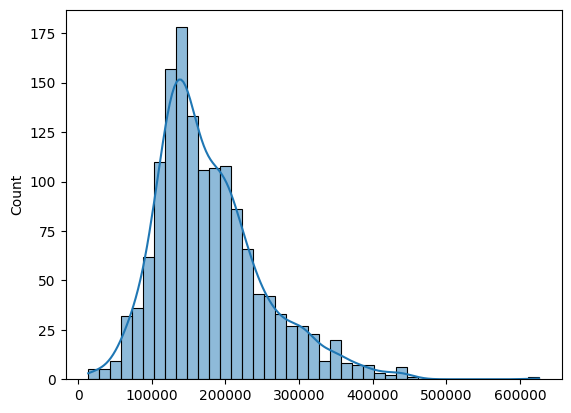

In [83]:
import seaborn as sns

sns.histplot(preds, kde=True)

In [84]:
res = xnew[["Id"]]
res.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [85]:
res["SalePrice"] = preds.round(2)
res

,Id,SalePrice
0,1461,111572.67
1,1462,153856.64
2,1463,171232.94
3,1464,180577.09
4,1465,189958.51
...,...,...
1454,2915,71304.21
1455,2916,74994.24
1456,2917,173260.89
1457,2918,113725.99


In [86]:
res.to_csv("results.csv", index=False)


# Save the model object, preprocessor and selectore


In [87]:
import joblib

joblib.dump(pre, "pre.joblib")


['pre.joblib']

In [88]:
joblib.dump(sel, "sel.joblib")


['sel.joblib']

In [89]:
joblib.dump(best_final_model, "ridge_price_model.joblib")


['ridge_price_model.joblib']

# Load th files

In [90]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [91]:
sel = joblib.load("sel.joblib")
sel

,estimator,LinearRegression()
,n_features_to_select,'auto'
,tol,None
,direction,'backward'
,scoring,None
,cv,5
,n_jobs,None
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [92]:
m = joblib.load("ridge_price_model.joblib")
m

,alpha,100
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [93]:
m.score(xtrain_pre_sel, ytrain)

0.8518160498472112

In [94]:
m.score(xtest_pre_sel, ytest)


0.8048627623719701